In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from cython_folder.cTTM.cttm import CTTM

In [2]:
# 単語集合
N_tdv = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_train.pkl')

#N_tdv_train = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_train.pkl')
#N_tdv_test = pd.read_pickle('../pickle_folder/q30/questions_bow_arr_test.pkl')

Sex_ds = pd.read_pickle('../pickle_folder/auxiliary/children_sex_count.pkl')
Con_ds = pd.read_pickle('../pickle_folder/auxiliary/additional_info.pkl')
Q_tds = pd.read_pickle('../pickle_folder/auxiliary/questions_meta_arr.pkl')
Q_td = Q_tds[:,:,2].astype('uint32')
Age_td = Q_tds[:, :, 1]
#for t in range(Age_td.shape[0]):
#    Age_td[t] = np.log1p(Age_td[t] - np.min(Age_td[t]))

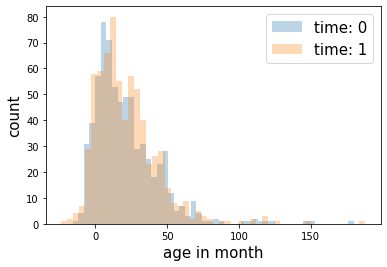

In [40]:
plt.hist(Q_tds[:,:,1][0], alpha=0.3, bins=50, label='time: 0')
plt.hist(Q_tds[:,:,1][1], alpha=0.3, bins=50, label='time: 1')
plt.xlabel('age in month', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [9]:
# 学習
# k: トピック数, L: 依存時間数, N_tdv: 時刻・ユーザー毎のBOW行列,
cttm = CTTM(K=20, L=1, N_tdv=N_tdv[:,:550,:], Sex_ds=Sex_ds[:550,:], Con_ds=Con_ds[:550,:], Q_td=Q_td[:,:550], Age_td=Age_td[:,:550])
# cttm_estimateの引数: 反復数
cttm.cttm_estimate(100)

100%|██████████| 100/100 [02:24<00:00,  1.44s/it]


In [3]:
# 学習
# k: トピック数, L: 依存時間数, N_tdv: 時刻・ユーザー毎のBOW行列,
cttm = CTTM(K=20, L=1, N_tdv=N_tdv, Sex_ds=Sex_ds, Con_ds=Con_ds, Q_td=Q_td, Age_td=Age_td)
# cttm_estimateの引数: 反復数
cttm.cttm_estimate(100)

100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


In [11]:
#pd.to_pickle(np.array(cttm.z_tdk_var[0]), '../pickle_folder/cttm_train/q30_cttm_z_tdk_var.pkl')

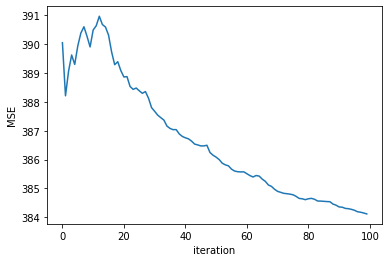

In [4]:
plt.plot(range(len(cttm.mse_list)), cttm.mse_list)
plt.ylabel("MSE")
plt.xlabel("iteration")
#plt.savefig("../images/mse_q30_cttm.png")
plt.show()

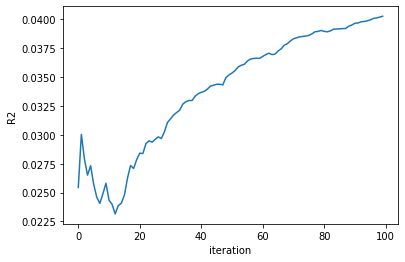

In [6]:
plt.plot(range(len(cttm.r_score)), cttm.r_score)
plt.ylabel("R2")
plt.xlabel("iteration")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

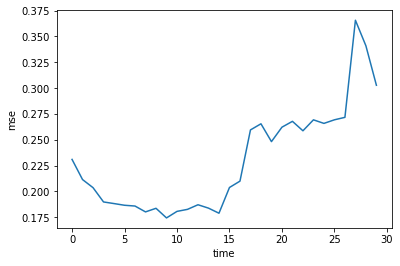

In [10]:
plt.plot(range(len(cttm.mse_t)), cttm.mse_t)
plt.ylabel("mse")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

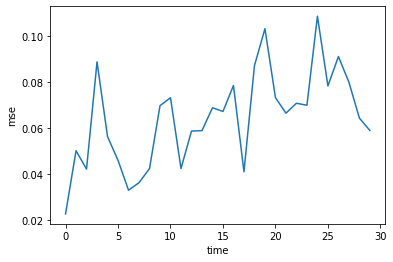

In [11]:
plt.plot(range(len(cttm.r_score_t)), cttm.r_score_t)
plt.ylabel("mse")
plt.xlabel("time")
#plt.savefig("../images/mse_time_q30_scttm.png")
plt.show()

In [6]:
np.array(cttm.eta_tk[0])

array([3.63667948, 3.6641028 , 3.69269922, 3.58387765, 3.71331364,
       3.81993358, 3.92178404, 3.61552724, 3.37857602, 3.67701335,
       4.00739611, 3.80627362, 3.25158691, 3.28517142, 3.32050177])

In [4]:
for k in range(cttm.K):
    phi_list = np.array(cttm.phi_tkv[1][k])
    print(list(np.argsort(-phi_list))[:20])

[166, 145, 197, 185, 18, 110, 102, 205, 12, 753, 78, 406, 174, 117, 68, 742, 339, 1263, 39, 2095]
[105, 337, 559, 516, 649, 13, 354, 187, 178, 205, 134, 54, 248, 107, 418, 593, 910, 775, 299, 218]
[140, 231, 119, 238, 38, 588, 701, 745, 608, 771, 2916, 766, 327, 73, 611, 30, 198, 464, 63, 569]
[150, 166, 55, 39, 66, 493, 68, 627, 205, 281, 29, 1018, 220, 82, 193, 316, 523, 2971, 92, 80]
[444, 112, 512, 189, 205, 8, 1, 337, 371, 1108, 818, 150, 29, 40, 1468, 136, 1575, 791, 86, 640]
[15, 198, 417, 39, 516, 509, 76, 364, 772, 563, 218, 134, 537, 41, 230, 366, 523, 200, 110, 214]
[96, 474, 97, 171, 31, 65, 196, 301, 269, 177, 163, 853, 107, 349, 955, 1031, 334, 363, 1378, 2135]
[18, 189, 134, 16, 352, 470, 359, 107, 1209, 511, 1307, 642, 744, 292, 1543, 258, 273, 245, 956, 641]
[31, 105, 20, 169, 753, 102, 233, 35, 194, 39, 107, 427, 123, 16, 104, 357, 120, 122, 1249, 690]
[18, 76, 16, 134, 337, 150, 145, 181, 105, 1014, 334, 550, 189, 443, 68, 11, 120, 646, 613, 166]
[37, 75, 85, 194, 34

In [5]:
# 補助情報分布
for k in range(cttm.K):
    print(np.array(cttm.psi_q_tks[0][k]))

[0.01775467 0.08283879 0.01775467 0.01775467 0.08283879 0.34317527
 0.01775467 0.27809115 0.01775467 0.01775467 0.01775467 0.01775467
 0.01775467 0.01775467 0.01775467 0.01775467]
[0.00459525 0.27411555 0.20673547 0.03828529 0.02144027 0.08882034
 0.03828529 0.00459525 0.02144027 0.07197532 0.02144027 0.10566536
 0.02144027 0.0551303  0.00459525 0.02144027]
[0.00251738 0.61157164 0.07634214 0.00251738 0.03020167 0.00251738
 0.04865786 0.02097357 0.06711405 0.04865786 0.03020167 0.03020167
 0.00251738 0.00251738 0.00251738 0.02097357]
[0.02631961 0.02631961 0.02631961 0.21928169 0.12280065 0.02631961
 0.02631961 0.02631961 0.02631961 0.12280065 0.02631961 0.12280065
 0.12280065 0.02631961 0.02631961 0.02631961]
[0.00659489 0.17582118 0.00659489 0.00659489 0.03077007 0.00659489
 0.00659489 0.19999636 0.15164599 0.00659489 0.00659489 0.00659489
 0.03077007 0.10329562 0.00659489 0.24834673]
[0.02631961 0.12280065 0.02631961 0.02631961 0.02631961 0.02631961
 0.12280065 0.02631961 0.02631961

In [4]:
# 一旦ファイル保存
"""
pd.to_pickle(np.array(cttm.theta_tdk), '../pickle_folder/q30_cttm/q30_cttm_theta.pkl')
pd.to_pickle(np.array(cttm.phi_tkv), '../pickle_folder/q30_cttm/q30_cttm_phi.pkl')
pd.to_pickle(np.array(cttm.psi_sex_tks), '../pickle_folder/q30_cttm/q30_cttm_psi_sex.pkl')
pd.to_pickle(np.array(cttm.psi_chi_tks), '../pickle_folder/q30_cttm/q30_cttm_psi_chi.pkl')
pd.to_pickle(np.array(cttm.psi_gen_tks), '../pickle_folder/q30_cttm/q30_cttm_psi_gen.pkl')
pd.to_pickle(np.array(cttm.psi_pre_tks), '../pickle_folder/q30_cttm/q30_cttm_psi_pre.pkl')
pd.to_pickle(np.array(cttm.psi_q_tks), '../pickle_folder/q30_cttm/q30_cttm_psi_q.pkl')
pd.to_pickle(np.array(cttm.alpha_tdl), '../pickle_folder/q30_cttm/q30_cttm_alpha.pkl')
pd.to_pickle(np.array(cttm.beta_tkl), '../pickle_folder/q30_cttm/q30_cttm_beta.pkl')
pd.to_pickle(np.array(cttm.gamma_sex_t), '../pickle_folder/q30_cttm/q30_cttm_gamma_sex_t.pkl')
pd.to_pickle(np.array(cttm.gamma_chi_t), '../pickle_folder/q30_cttm/q30_cttm_gamma_chi_t.pkl')
pd.to_pickle(np.array(cttm.gamma_gen_t), '../pickle_folder/q30_cttm/q30_cttm_gamma_gen_t.pkl')
pd.to_pickle(np.array(cttm.gamma_pre_t), '../pickle_folder/q30_cttm/q30_cttm_gamma_pre_t.pkl')
pd.to_pickle(np.array(cttm.gamma_q_t), '../pickle_folder/q30_cttm/q30_cttm_gamma_q_t.pkl')
pd.to_pickle(np.array(cttm.r_score_t), '../pickle_folder/q30_cttm/q30_cttm_r_score_t.pkl')
pd.to_pickle(np.array(cttm.mse_t), '../pickle_folder/q30_cttm/q30_cttm_mse_t.pkl')
pd.to_pickle(np.array(cttm.r_score), '../pickle_folder/q30_cttm/q30_cttm_r_score.pkl')
pd.to_pickle(np.array(cttm.mse_list), '../pickle_folder/q30_cttm/q30_cttm_mse_list.pkl')

In [10]:
# 訓練データ保存
"""
pd.to_pickle(np.array(cttm.theta_tdk), '../pickle_folder/cttm_train/q30_cttm_theta.pkl')
pd.to_pickle(np.array(cttm.phi_tkv), '../pickle_folder/cttm_train/q30_cttm_phi.pkl')
pd.to_pickle(np.array(cttm.psi_sex_tks), '../pickle_folder/cttm_train/q30_cttm_psi_sex.pkl')
pd.to_pickle(np.array(cttm.psi_chi_tks), '../pickle_folder/cttm_train/q30_cttm_psi_chi.pkl')
pd.to_pickle(np.array(cttm.psi_gen_tks), '../pickle_folder/cttm_train/q30_cttm_psi_gen.pkl')
pd.to_pickle(np.array(cttm.psi_pre_tks), '../pickle_folder/cttm_train/q30_cttm_psi_pre.pkl')
pd.to_pickle(np.array(cttm.psi_q_tks), '../pickle_folder/cttm_train/q30_cttm_psi_q.pkl')
pd.to_pickle(np.array(cttm.alpha_tdl), '../pickle_folder/cttm_train/q30_cttm_alpha.pkl')
pd.to_pickle(np.array(cttm.beta_tkl), '../pickle_folder/cttm_train/q30_cttm_beta.pkl')
pd.to_pickle(np.array(cttm.gamma_sex_t), '../pickle_folder/cttm_train/q30_cttm_gamma_sex_t.pkl')
pd.to_pickle(np.array(cttm.gamma_chi_t), '../pickle_folder/cttm_train/q30_cttm_gamma_chi_t.pkl')
pd.to_pickle(np.array(cttm.gamma_gen_t), '../pickle_folder/cttm_train/q30_cttm_gamma_gen_t.pkl')
pd.to_pickle(np.array(cttm.gamma_pre_t), '../pickle_folder/cttm_train/q30_cttm_gamma_pre_t.pkl')
pd.to_pickle(np.array(cttm.gamma_q_t), '../pickle_folder/cttm_train/q30_cttm_gamma_q_t.pkl')
pd.to_pickle(np.array(cttm.eta_tk), '../pickle_folder/cttm_train/q30_cttm_eta_tk.pkl')
pd.to_pickle(np.array(cttm.r_score_t), '../pickle_folder/cttm_train/q30_cttm_r_score_t.pkl')
pd.to_pickle(np.array(cttm.mse_t), '../pickle_folder/cttm_train/q30_cttm_mse_t.pkl')
pd.to_pickle(np.array(cttm.r_score), '../pickle_folder/cttm_train/q30_cttm_r_score.pkl')
pd.to_pickle(np.array(cttm.mse_list), '../pickle_folder/cttm_train/q30_cttm_mse_list.pkl')